In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

import numpy as np
import os

# Load the effective areas

In [2]:
path = 'resources/'
results = np.load(os.path.join(path, 'effective_areas_av_per_day.npy'))

# 2d plot of effective areas of icecube and plenum (icecube+km3net+p-one+GVD)

<IPython.core.display.Javascript object>


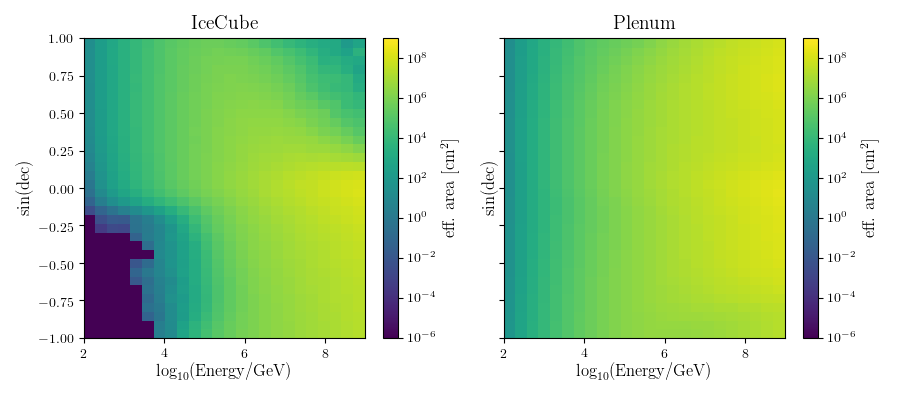

/Users/mhuber/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [3]:
e_bins = np.linspace(2.,9.,num=25)
sd_bins = np.linspace(-1.,1.,35)
n_sd, n_e = len(sd_bins)-1, len(e_bins)-1



fig, axes=plt.subplots(ncols=2, figsize=(9,4), sharey=True)

ax = axes[0]
ax.set_title('IceCube', fontsize=14)
p = ax.pcolormesh(e_bins, sd_bins, #Res_effA*1e4
                  results['effA_icecube'].reshape((n_sd, n_e)) 
                  , norm=LogNorm(),#, vmin=1e-2)#, 
                  vmax = 1e9, vmin=1e-6)

ax.set_xlabel(r'$\log_{10}$(Energy/GeV)',fontsize=12)
ax.set_ylabel(r'sin(dec)',fontsize=12)

cb=fig.colorbar(p,ax=ax)
cb.set_label(r'eff. area [cm$^2$]', fontsize=12)

ax = axes[1]
ax.set_title('Plenum', fontsize=14)
p = ax.pcolormesh(e_bins, sd_bins,
                  results['effA_plenum'].reshape((n_sd, n_e))  
                  , norm=LogNorm(),#, vmin=1e-2)#, 
                  vmax = 1e9, vmin=1e-6)

ax.set_xlabel(r'$\log_{10}$(Energy/GeV)',fontsize=12)
ax.set_ylabel(r'sin(dec)',fontsize=12)

cb=fig.colorbar(p,ax=ax)
cb.set_label(r'eff. area [cm$^2$]', fontsize=12)

fig.tight_layout()
plt.show()

# 1d slices for different declination bands

<IPython.core.display.Javascript object>


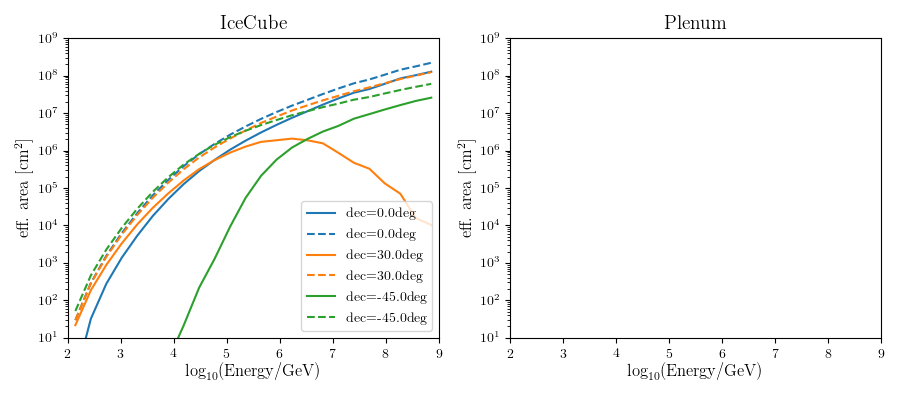

In [5]:
fig, axes=plt.subplots(ncols=2, figsize=(9,4), sharey=False)

def search_ind(sinDec):
    ind = np.argmin(np.abs(sd_bins - sinDec))
    return ind

decs = [0, np.sin(np.deg2rad(30)), np.sin(np.deg2rad(-45))]

res_icecube = results['effA_icecube'].reshape((n_sd, n_e))
res_plenum = results['effA_plenum'].reshape((n_sd, n_e))

axes[0].set_title('IceCube', fontsize=14)
axes[1].set_title('Plenum', fontsize=14)

for di in decs:
    indi = search_ind(di)
    
    p=axes[0].plot((e_bins[1:]+e_bins[:-1])/2., res_icecube[indi],
           label=r'dec={0:.1f}deg'.format(np.rad2deg(np.arcsin(di))))

    axes[0].plot((e_bins[1:]+e_bins[:-1])/2., res_plenum[indi],
           label=r'dec={0:.1f}deg'.format(np.rad2deg(np.arcsin(di))),
                ls='dashed', color=p[0].get_color())
    
for ax in axes:
    ax.set_xlim(2,9)
    ax.set_ylim(1e1,1e9)
    ax.set_yscale('log')
    ax.set_xlabel(r'$\log_{10}$(Energy/GeV)',fontsize=12)
    ax.set_ylabel(r'eff. area [cm$^2$]', fontsize=12)

axes[0].legend()
fig.tight_layout()
